In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
house = pd.read_excel('C:/Users/email/Documents/Folders/MACHINE LEARNING - AUGUST 2025/housing_sample_clean.xlsx')
house.shape

(1399, 10)

In [3]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1399 entries, 0 to 1398
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Unnamed: 0    1399 non-null   int64
 1   Id            1399 non-null   int64
 2   LotArea       1399 non-null   int64
 3   YearBuilt     1399 non-null   int64
 4   FullBath      1399 non-null   int64
 5   TotRmsAbvGrd  1399 non-null   int64
 6   GarageArea    1399 non-null   int64
 7   1stFlrSF      1399 non-null   int64
 8   2ndFlrSF      1399 non-null   int64
 9   SalePrice     1399 non-null   int64
dtypes: int64(10)
memory usage: 109.4 KB


In [4]:
house.head()

,Unnamed: 0,Id,LotArea,YearBuilt,FullBath,TotRmsAbvGrd,GarageArea,1stFlrSF,2ndFlrSF,SalePrice
0,0,1,8450,2003,2,8,548,856,854,208500
1,1,2,9600,1976,2,6,460,1262,0,181500
2,2,3,11250,2001,2,6,608,920,866,223500
3,3,4,9550,1915,1,7,642,961,756,140000
4,4,5,14260,2000,2,9,836,1145,1053,250000


In [5]:
house.describe()

,Unnamed: 0,Id,LotArea,YearBuilt,FullBath,TotRmsAbvGrd,GarageArea,1stFlrSF,2ndFlrSF,SalePrice
count,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000
mean,732.508935,733.508935,10155.280915,1970.080772,1.540386,6.416726,458.817012,1132.247320,336.476054,170237.127234
std,422.811873,422.811873,8324.834198,30.009463,0.537219,1.544766,204.278673,357.318243,421.440524,59230.130817
min,0.000000,1.000000,1300.000000,1872.000000,0.000000,2.000000,0.000000,334.000000,0.000000,34900.000000
25%,366.500000,367.500000,7442.000000,1953.000000,1.000000,5.000000,312.000000,870.500000,0.000000,129000.000000
50%,738.000000,739.000000,9317.000000,1971.000000,2.000000,6.000000,471.000000,1069.000000,0.000000,159500.000000
75%,1097.500000,1098.500000,11316.500000,1999.000000,2.000000,7.000000,573.000000,1346.500000,720.000000,203500.000000
max,1459.000000,1460.000000,164660.000000,2009.000000,3.000000,14.000000,1418.000000,4692.000000,1818.000000,340000.000000


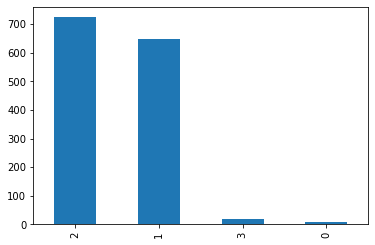

In [7]:
house['FullBath'].value_counts().plot.bar()
plt.show()

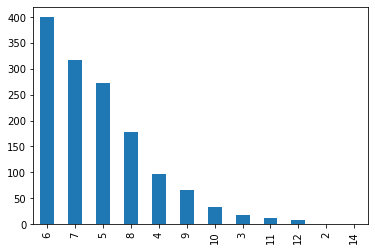

In [10]:
house['TotRmsAbvGrd'].value_counts().plot.bar()
plt.show()

array([[<AxesSubplot:title={'center':'SalePrice'}>,
        <AxesSubplot:title={'center':'GarageArea'}>],
       [<AxesSubplot:title={'center':'FullBath'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>],
       [<AxesSubplot:title={'center':'TotRmsAbvGrd'}>, <AxesSubplot:>]],
      dtype=object)

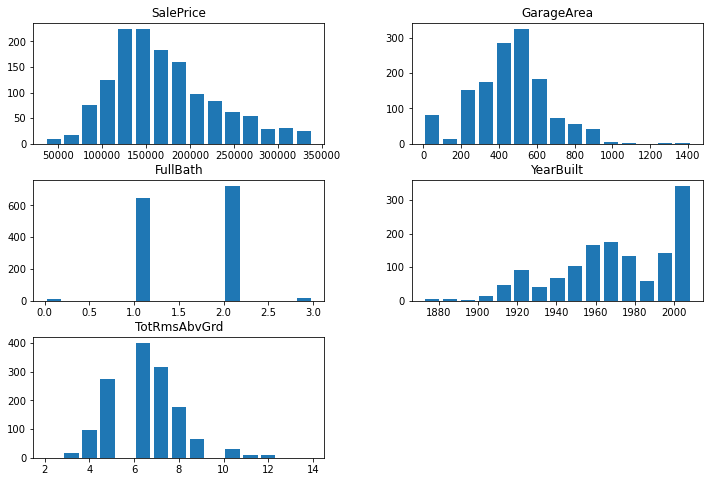

In [12]:
house[['SalePrice', 'GarageArea', 'FullBath', 'YearBuilt', 'TotRmsAbvGrd']].hist(bins=15, figsize=(12, 8), grid=False, rwidth=0.8)

In [13]:
c = house['FullBath'].value_counts(dropna=True)
p = house['FullBath'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.concat([c,p], axis=1, keys=['counts', '%'])

,counts,%
2,724,51.8%
1,647,46.2%
3,20,1.4%
0,8,0.6%


In [18]:
house.groupby('FullBath')['SalePrice'].describe().round(1)

,count,mean,std,min,25%,50%,75%,max
FullBath,,,,,,,,
0,8.0,137726.0,71393.9,35311.0,96969.2,144500.0,163553.0,260000.0
1,647.0,133545.1,37649.8,34900.0,111625.0,132000.0,149950.0,325624.0
2,724.0,201419.7,55135.3,55000.0,164997.5,192500.0,236625.0,340000.0
3,20.0,241417.4,60874.1,170000.0,187937.5,226437.5,302100.0,340000.0


In [21]:
house.groupby('FullBath')['SalePrice'].mean().round(1)

FullBath
0    137726.0
1    133545.1
2    201419.7
3    241417.4
Name: SalePrice, dtype: float64

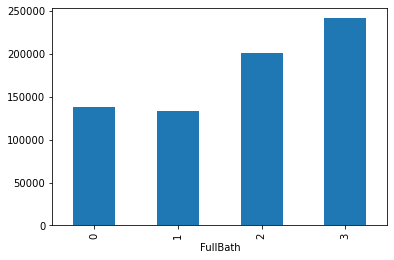

In [20]:
house.groupby('FullBath')['SalePrice'].mean().plot.bar()
plt.show()

In [14]:
c = house['TotRmsAbvGrd'].value_counts(dropna=True)
p = house['TotRmsAbvGrd'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.concat([c,p], axis=1, keys=['counts', '%'])

,counts,%
6,400,28.6%
7,317,22.7%
5,273,19.5%
8,177,12.7%
4,97,6.9%
9,65,4.6%
10,32,2.3%
3,17,1.2%
11,11,0.8%
12,8,0.6%


In [19]:
house.groupby('TotRmsAbvGrd')['SalePrice'].describe().round(1)

,count,mean,std,min,25%,50%,75%,max
TotRmsAbvGrd,,,,,,,,
2,1.0,39300.0,NaN,39300.0,39300.0,39300.0,39300.0,39300.0
3,17.0,111217.6,33108.1,60000.0,81000.0,100000.0,143000.0,155900.0
4,97.0,122844.6,41661.8,34900.0,93000.0,120500.0,140000.0,260000.0
5,273.0,139739.8,45069.1,52000.0,112500.0,130000.0,156000.0,328900.0
6,400.0,160243.8,46455.4,37900.0,131475.0,154750.0,185000.0,325000.0
7,317.0,189497.4,53388.7,55000.0,153900.0,181900.0,226000.0,340000.0
8,177.0,202914.4,60497.4,81000.0,157000.0,193500.0,239900.0,340000.0
9,65.0,231181.1,63550.0,98000.0,187500.0,242000.0,278000.0,335000.0
10,32.0,215226.5,77012.4,90000.0,142200.0,226750.0,285500.0,335000.0


In [16]:
c = house['YearBuilt'].value_counts(dropna=True)
p = house['YearBuilt'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.concat([c,p], axis=1, keys=['counts', '%'])

,counts,%
2005,58,4.1%
2006,57,4.1%
2004,52,3.7%
2007,44,3.1%
2003,40,2.9%
...,...,...
1911,1,0.1%
1917,1,0.1%
1892,1,0.1%
1872,1,0.1%


<AxesSubplot:xlabel='YearBuilt'>

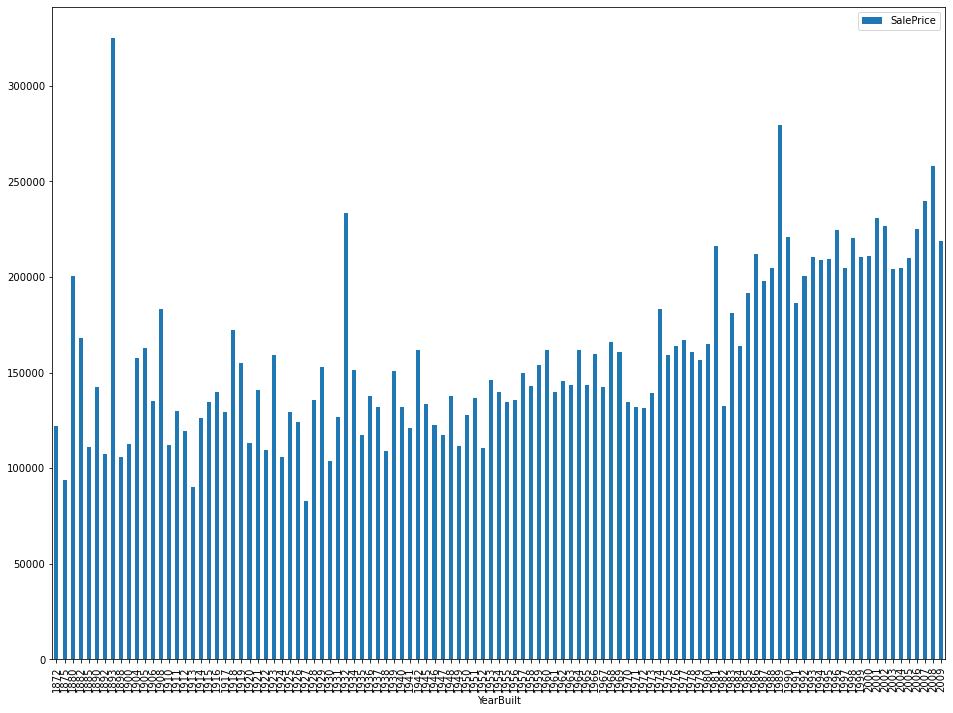

In [30]:
house.groupby('YearBuilt')[['SalePrice']].mean().plot.bar(figsize=(16, 12), grid=False)

In [133]:
house.loc[house['YearBuilt'] == 1932]

,Unnamed: 0,Id,LotArea,YearBuilt,FullBath,TotRmsAbvGrd,GarageArea,1stFlrSF,2ndFlrSF,SalePrice
182,190,191,10570,1932,2,10,440,1549,1178,315000
646,681,682,4500,1932,1,6,281,848,672,159434
1010,1059,1060,11275,1932,1,7,432,1096,895,220000
1123,1174,1175,16560,1932,2,9,360,1170,1175,239000


In [134]:
house.loc[house['YearBuilt'] == 1989]

,Unnamed: 0,Id,LotArea,YearBuilt,FullBath,TotRmsAbvGrd,GarageArea,1stFlrSF,2ndFlrSF,SalePrice
269,280,281,11287,1989,2,7,575,1175,807,228500
407,426,427,12800,1989,2,5,569,1644,0,275000
655,692,693,26178,1989,2,9,628,1238,1281,335000


In [135]:
house.loc[house['YearBuilt'] == 1893]

,Unnamed: 0,Id,LotArea,YearBuilt,FullBath,TotRmsAbvGrd,GarageArea,1stFlrSF,2ndFlrSF,SalePrice
557,583,584,13500,1893,3,9,880,1521,1254,325000


In [31]:
house.groupby('YearBuilt')['SalePrice'].max().round(1)

YearBuilt
1872    122000
1875     94000
1880    295000
1882    168000
1885    122500
         ...  
2005    325300
2006    337500
2007    339750
2008    335000
2009    269500
Name: SalePrice, Length: 111, dtype: int64

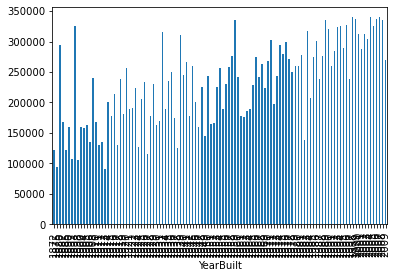

In [32]:
house.groupby('YearBuilt')['SalePrice'].max().plot.bar()
plt.show()

<AxesSubplot:xlabel='YearBuilt'>

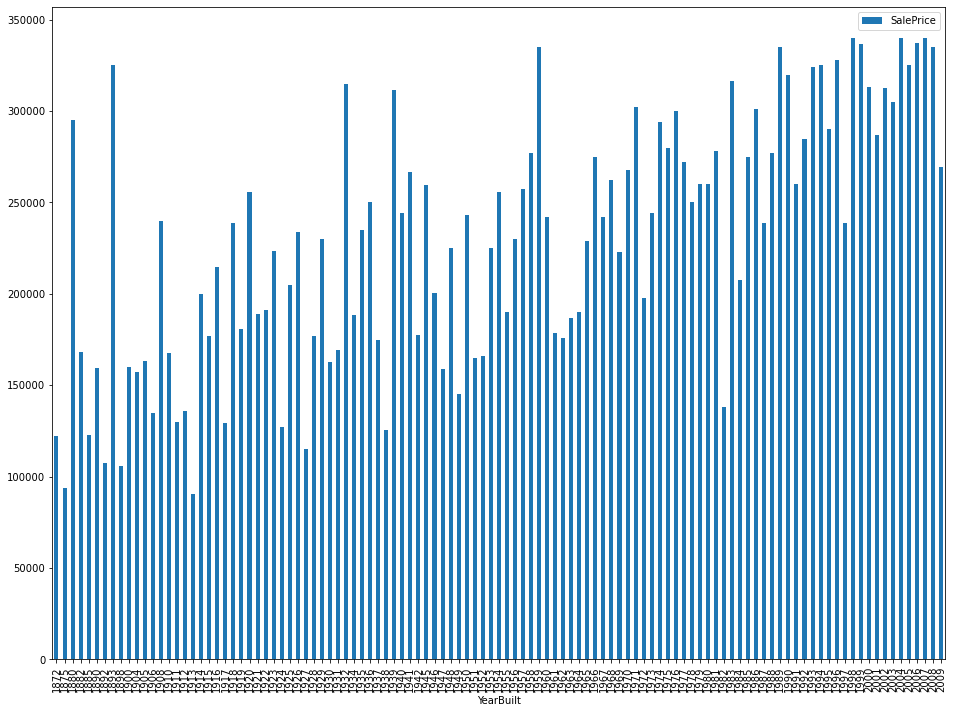

In [33]:
house.groupby('YearBuilt')[['SalePrice']].max().plot.bar(figsize=(16, 12), grid=False)

<AxesSubplot:xlabel='YearBuilt'>

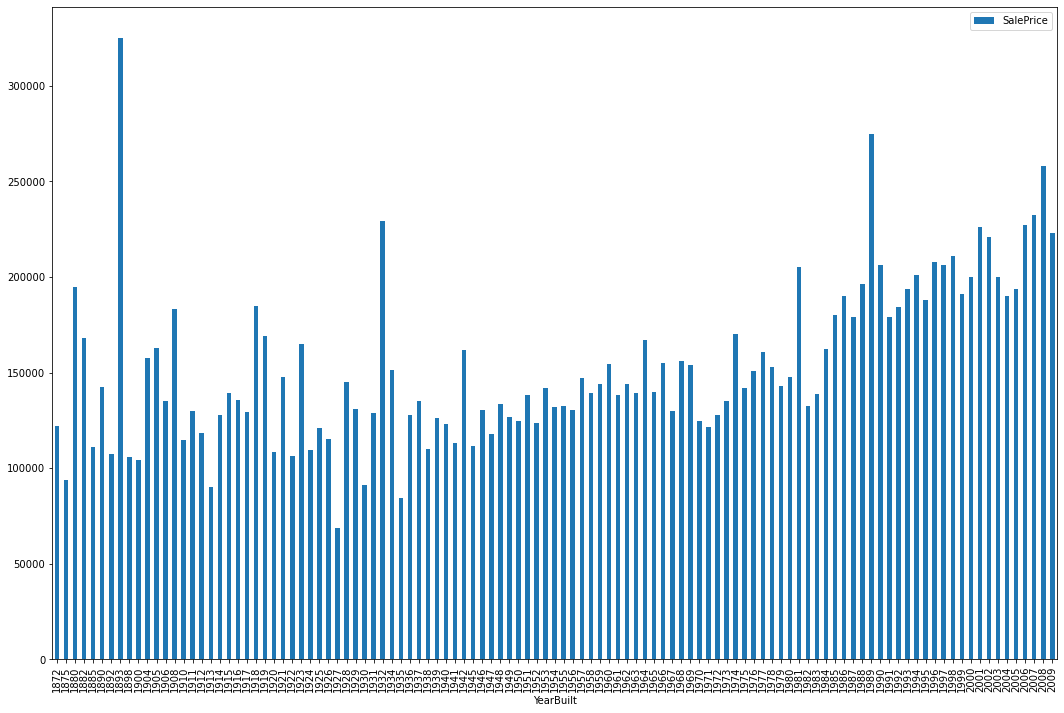

In [75]:
house.groupby('YearBuilt')[['SalePrice']].median().plot.bar(figsize=(18, 12), grid=False)

In [39]:
house.groupby('YearBuilt')['SalePrice'].mean()

YearBuilt
1872    122000.000000
1875     94000.000000
1880    200619.750000
1882    168000.000000
1885    111250.000000
            ...      
2005    210181.379310
2006    225051.666667
2007    239850.045455
2008    257928.166667
2009    218955.142857
Name: SalePrice, Length: 111, dtype: float64

In [49]:
house['year'] = house.groupby('YearBuilt')['SalePrice'].mean()

In [53]:
house

,Unnamed: 0,Id,LotArea,YearBuilt,FullBath,TotRmsAbvGrd,GarageArea,1stFlrSF,2ndFlrSF,SalePrice,year
0,0,1,8450,2003,2,8,548,856,854,208500,NaN
1,1,2,9600,1976,2,6,460,1262,0,181500,NaN
2,2,3,11250,2001,2,6,608,920,866,223500,NaN
3,3,4,9550,1915,1,7,642,961,756,140000,NaN
4,4,5,14260,2000,2,9,836,1145,1053,250000,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1394,1455,1456,7917,1999,2,7,460,953,694,175000,NaN
1395,1456,1457,13175,1978,2,7,500,2073,0,210000,NaN
1396,1457,1458,9042,1941,2,9,252,1188,1152,266500,NaN
1397,1458,1459,9717,1950,1,5,240,1078,0,142125,NaN


In [55]:
del house['year']

In [56]:
house

,Unnamed: 0,Id,LotArea,YearBuilt,FullBath,TotRmsAbvGrd,GarageArea,1stFlrSF,2ndFlrSF,SalePrice
0,0,1,8450,2003,2,8,548,856,854,208500
1,1,2,9600,1976,2,6,460,1262,0,181500
2,2,3,11250,2001,2,6,608,920,866,223500
3,3,4,9550,1915,1,7,642,961,756,140000
4,4,5,14260,2000,2,9,836,1145,1053,250000
...,...,...,...,...,...,...,...,...,...,...
1394,1455,1456,7917,1999,2,7,460,953,694,175000
1395,1456,1457,13175,1978,2,7,500,2073,0,210000
1396,1457,1458,9042,1941,2,9,252,1188,1152,266500
1397,1458,1459,9717,1950,1,5,240,1078,0,142125


In [61]:
df = pd.DataFrame(house.groupby('YearBuilt')['SalePrice'].describe())

In [62]:
df

,count,mean,std,min,25%,50%,75%,max
YearBuilt,,,,,,,,
1872,1.0,122000.000000,NaN,122000.0,122000.0,122000.0,122000.00,122000.0
1875,1.0,94000.000000,NaN,94000.0,94000.0,94000.0,94000.00,94000.0
1880,4.0,200619.750000,93021.399116,117500.0,122375.0,194989.5,273234.25,295000.0
1882,1.0,168000.000000,NaN,168000.0,168000.0,168000.0,168000.00,168000.0
1885,2.0,111250.000000,15909.902577,100000.0,105625.0,111250.0,116875.00,122500.0
...,...,...,...,...,...,...,...,...
2005,58.0,210181.379310,52068.322977,140000.0,173925.0,193600.0,251500.00,325300.0
2006,57.0,225051.666667,50337.356993,84500.0,193879.0,227000.0,255500.00,337500.0
2007,44.0,239850.045455,57336.051359,146000.0,192062.5,232564.0,298619.25,339750.0


In [63]:
df['50%'].describe()

count       111.000000
mean     153890.270270
std       42068.976456
min       68500.000000
25%      127350.000000
50%      142200.000000
75%      181750.000000
max      325000.000000
Name: 50%, dtype: float64

In [71]:
sorted_df = df.sort_values(by='50%')
sorted_df[:15]

,count,mean,std,min,25%,50%,75%,max
YearBuilt,,,,,,,,
1927,3.0,82666.666667,28072.821970,64500.0,66500.0,68500.0,91750.0,115000.0
1935,5.0,117100.000000,72036.796153,52000.0,81000.0,84500.0,133000.0,235000.0
1913,1.0,90350.000000,NaN,90350.0,90350.0,90350.0,90350.0,90350.0
1930,9.0,103588.888889,33123.535607,55000.0,87000.0,91000.0,120500.0,162900.0
1875,1.0,94000.000000,NaN,94000.0,94000.0,94000.0,94000.0,94000.0
1900,10.0,112492.600000,27666.522346,79000.0,91250.0,104513.0,134750.0,160000.0
1898,1.0,106000.000000,NaN,106000.0,106000.0,106000.0,106000.0,106000.0
1922,8.0,109237.500000,43835.502164,55000.0,83500.0,106450.0,128500.0,191000.0
1892,1.0,107500.000000,NaN,107500.0,107500.0,107500.0,107500.0,107500.0


In [72]:
sorted_df = df.sort_values(by='mean')
sorted_df[:15]

,count,mean,std,min,25%,50%,75%,max
YearBuilt,,,,,,,,
1927,3.0,82666.666667,28072.821970,64500.0,66500.0,68500.0,91750.0,115000.0
1913,1.0,90350.000000,NaN,90350.0,90350.0,90350.0,90350.0,90350.0
1875,1.0,94000.000000,NaN,94000.0,94000.0,94000.0,94000.0,94000.0
1930,9.0,103588.888889,33123.535607,55000.0,87000.0,91000.0,120500.0,162900.0
1924,7.0,105985.714286,14535.637650,79000.0,102450.0,109500.0,110750.0,127000.0
1898,1.0,106000.000000,NaN,106000.0,106000.0,106000.0,106000.0,106000.0
1892,1.0,107500.000000,NaN,107500.0,107500.0,107500.0,107500.0,107500.0
1938,4.0,109137.500000,16145.452146,91300.0,97825.0,109875.0,121187.5,125500.0
1922,8.0,109237.500000,43835.502164,55000.0,83500.0,106450.0,128500.0,191000.0


# Finding YearBuilt with the highest SalePrice when YearBuilt <=1915

In [138]:
year1 = house.loc[house['YearBuilt'] <= 1915]

In [139]:
year1['YearBuilt'].value_counts()[:5]

1910    17
1915    10
1900    10
1914     7
1880     4
Name: YearBuilt, dtype: int64

In [140]:
year1.groupby('YearBuilt')['SalePrice'].describe()[:5]

,count,mean,std,min,25%,50%,75%,max
YearBuilt,,,,,,,,
1872,1.0,122000.00,NaN,122000.0,122000.0,122000.0,122000.00,122000.0
1875,1.0,94000.00,NaN,94000.0,94000.0,94000.0,94000.00,94000.0
1880,4.0,200619.75,93021.399116,117500.0,122375.0,194989.5,273234.25,295000.0
1882,1.0,168000.00,NaN,168000.0,168000.0,168000.0,168000.00,168000.0
1885,2.0,111250.00,15909.902577,100000.0,105625.0,111250.0,116875.00,122500.0


In [142]:
df_year1 = pd.DataFrame(year1.groupby('YearBuilt')['SalePrice'].describe())

In [143]:
df_year1[:5]

,count,mean,std,min,25%,50%,75%,max
YearBuilt,,,,,,,,
1872,1.0,122000.00,NaN,122000.0,122000.0,122000.0,122000.00,122000.0
1875,1.0,94000.00,NaN,94000.0,94000.0,94000.0,94000.00,94000.0
1880,4.0,200619.75,93021.399116,117500.0,122375.0,194989.5,273234.25,295000.0
1882,1.0,168000.00,NaN,168000.0,168000.0,168000.0,168000.00,168000.0
1885,2.0,111250.00,15909.902577,100000.0,105625.0,111250.0,116875.00,122500.0


In [144]:
sorted_df = df_year1.sort_values(by='50%', ascending=False)
sorted_df[:5]

,count,mean,std,min,25%,50%,75%,max
YearBuilt,,,,,,,,
1893,1.0,325000.00,NaN,325000.0,325000.0,325000.0,325000.00,325000.0
1880,4.0,200619.75,93021.399116,117500.0,122375.0,194989.5,273234.25,295000.0
1908,2.0,183500.00,79903.066274,127000.0,155250.0,183500.0,211750.00,240000.0
1882,1.0,168000.00,NaN,168000.0,168000.0,168000.0,168000.00,168000.0
1905,1.0,163000.00,NaN,163000.0,163000.0,163000.0,163000.00,163000.0


# YearBuilt > 1915 and YearBuilt <= 1960

In [94]:
year2 = house.loc[(house['YearBuilt'] > 1915) & (house['YearBuilt'] <= 1960)]

In [107]:
year2.YearBuilt.min()

1916

In [108]:
year2.YearBuilt.max()

1960

In [109]:
year2[:5]

,Unnamed: 0,Id,LotArea,YearBuilt,FullBath,TotRmsAbvGrd,GarageArea,1stFlrSF,2ndFlrSF,SalePrice
8,8,9,6120,1931,2,8,468,1022,752,129900
9,9,10,7420,1939,1,5,205,1077,0,118000
13,14,15,10920,1960,1,5,352,1253,0,157000
14,15,16,6120,1929,1,5,576,854,0,132000
18,19,20,7560,1958,1,6,294,1339,0,139000


In [113]:
df_year2 = pd.DataFrame(year2.groupby('YearBuilt')['SalePrice'].describe())

In [115]:
df_year2[:5] 

,count,mean,std,min,25%,50%,75%,max
YearBuilt,,,,,,,,
1916,8.0,139800.000000,35932.357085,98000.0,118225.0,135500.0,148000.0,214500.0
1917,1.0,129500.000000,NaN,129500.0,129500.0,129500.0,129500.0,129500.0
1918,7.0,172421.428571,53925.812134,112000.0,123000.0,185000.0,212475.0,239000.0
1919,3.0,154833.333333,34972.608329,115000.0,142000.0,169000.0,174750.0,180500.0
1920,30.0,112903.333333,47291.476839,34900.0,83750.0,108250.0,135125.0,256000.0


In [127]:
sorted_df = df_year2.sort_values(by='50%', ascending=False)
sorted_df[:5]

,count,mean,std,min,25%,50%,75%,max
YearBuilt,,,,,,,,
1932,4.0,233358.500000,64136.423003,159434.0,204858.5,229500.0,258000.0,315000.0
1918,7.0,172421.428571,53925.812134,112000.0,123000.0,185000.0,212475.0,239000.0
1919,3.0,154833.333333,34972.608329,115000.0,142000.0,169000.0,174750.0,180500.0
1923,7.0,159428.571429,56478.925695,85500.0,112500.0,165000.0,208500.0,223500.0
1942,2.0,162000.000000,21920.310217,146500.0,154250.0,162000.0,169750.0,177500.0


# YearBuilt > 1960

In [117]:
year3 = house.loc[house['YearBuilt'] > 1960]

In [120]:
year3.YearBuilt.min()

1961

In [121]:
year3.YearBuilt.max()

2009

In [123]:
df_year3 = pd.DataFrame(year3.groupby('YearBuilt')['SalePrice'].describe())

In [124]:
df_year3[:5]

,count,mean,std,min,25%,50%,75%,max
YearBuilt,,,,,,,,
1961,14.0,139846.428571,20375.140059,98600.0,129600.0,138225.0,146500.0,178400.0
1962,19.0,145742.105263,21292.469086,101800.0,132500.0,143900.0,162500.0,176000.0
1963,16.0,143403.125000,19396.567297,110000.0,132437.5,139500.0,154625.0,186700.0
1964,15.0,161893.333333,21732.775336,115000.0,158000.0,167000.0,174500.0,190000.0
1965,23.0,143468.826087,36305.259034,62383.0,129250.0,140000.0,151750.0,228950.0


In [128]:
sorted_df = df_year3.sort_values(by='50%', ascending=False)
sorted_df[:5]

,count,mean,std,min,25%,50%,75%,max
YearBuilt,,,,,,,,
1989,3.0,279500.000000,53392.415192,228500.0,251750.0,275000.0,305000.00,335000.0
2008,12.0,257928.166667,46838.002637,160000.0,240370.0,257896.5,289190.75,335000.0
2007,44.0,239850.045455,57336.051359,146000.0,192062.5,232564.0,298619.25,339750.0
2006,57.0,225051.666667,50337.356993,84500.0,193879.0,227000.0,255500.00,337500.0
2001,19.0,230847.368421,32290.579438,178000.0,214250.0,226000.0,249000.00,287000.0


# Finding particular houses built in 1893, 1932, and 1989

In [145]:
house.loc[house['YearBuilt'] == 1893]

,Unnamed: 0,Id,LotArea,YearBuilt,FullBath,TotRmsAbvGrd,GarageArea,1stFlrSF,2ndFlrSF,SalePrice
557,583,584,13500,1893,3,9,880,1521,1254,325000


In [146]:
house.loc[house['YearBuilt'] == 1932]

,Unnamed: 0,Id,LotArea,YearBuilt,FullBath,TotRmsAbvGrd,GarageArea,1stFlrSF,2ndFlrSF,SalePrice
182,190,191,10570,1932,2,10,440,1549,1178,315000
646,681,682,4500,1932,1,6,281,848,672,159434
1010,1059,1060,11275,1932,1,7,432,1096,895,220000
1123,1174,1175,16560,1932,2,9,360,1170,1175,239000


In [147]:
house.loc[house['YearBuilt'] == 1989]

,Unnamed: 0,Id,LotArea,YearBuilt,FullBath,TotRmsAbvGrd,GarageArea,1stFlrSF,2ndFlrSF,SalePrice
269,280,281,11287,1989,2,7,575,1175,807,228500
407,426,427,12800,1989,2,5,569,1644,0,275000
655,692,693,26178,1989,2,9,628,1238,1281,335000


In [148]:
house2 = house.drop([557, 182, 655])

In [149]:
house2.shape

(1396, 10)

In [150]:
house2.loc[house2['YearBuilt'] == 1893]

,Unnamed: 0,Id,LotArea,YearBuilt,FullBath,TotRmsAbvGrd,GarageArea,1stFlrSF,2ndFlrSF,SalePrice


In [151]:
house2.loc[house2['YearBuilt'] == 1932]

,Unnamed: 0,Id,LotArea,YearBuilt,FullBath,TotRmsAbvGrd,GarageArea,1stFlrSF,2ndFlrSF,SalePrice
646,681,682,4500,1932,1,6,281,848,672,159434
1010,1059,1060,11275,1932,1,7,432,1096,895,220000
1123,1174,1175,16560,1932,2,9,360,1170,1175,239000


In [152]:
house2.loc[house2['YearBuilt'] == 1989]

,Unnamed: 0,Id,LotArea,YearBuilt,FullBath,TotRmsAbvGrd,GarageArea,1stFlrSF,2ndFlrSF,SalePrice
269,280,281,11287,1989,2,7,575,1175,807,228500
407,426,427,12800,1989,2,5,569,1644,0,275000


# Transforming FullBath into a new variable with three categories

In [153]:
house2.FullBath.value_counts()

2    722
1    647
3     19
0      8
Name: FullBath, dtype: int64

In [154]:
house2.groupby('FullBath')['SalePrice'].describe()

,count,mean,std,min,25%,50%,75%,max
FullBath,,,,,,,,
0,8.0,137726.000000,71393.863046,35311.0,96969.25,144500.0,163553.0,260000.0
1,647.0,133545.146832,37649.802832,34900.0,111625.00,132000.0,149950.0,325624.0
2,722.0,201077.387812,54823.127488,55000.0,164992.50,192320.0,236375.0,340000.0
3,19.0,237018.368421,59186.036778,170000.0,186875.00,225000.0,297400.0,340000.0


In [155]:
def categorise (row):
    if row['FullBath'] == 0:
        return 1
    elif row['FullBath'] == 1:
        return 1
    elif row['FullBath'] == 2:
        return 2
    elif row['FullBath'] == 3:
        return 3

In [156]:
house2['FullBath2'] = house2.apply(lambda row: categorise (row), axis=1)

In [157]:
house2.FullBath2.value_counts()

2    722
1    655
3     19
Name: FullBath2, dtype: int64

In [158]:
house2.groupby('FullBath2')['SalePrice'].describe()

,count,mean,std,min,25%,50%,75%,max
FullBath2,,,,,,,,
1,655.0,133596.210687,38143.613582,34900.0,111125.0,132250.0,150000.0,325624.0
2,722.0,201077.387812,54823.127488,55000.0,164992.5,192320.0,236375.0,340000.0
3,19.0,237018.368421,59186.036778,170000.0,186875.0,225000.0,297400.0,340000.0


<AxesSubplot:xlabel='FullBath2'>

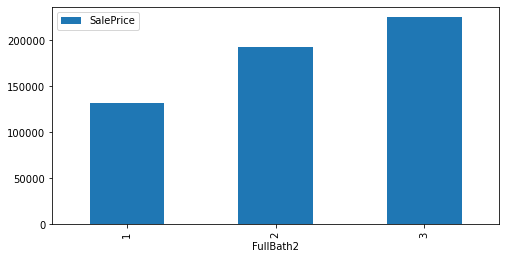

In [188]:
house2.groupby('FullBath2')[['SalePrice']].median().plot.bar(figsize=(8, 4), grid=False)

# Transforming YearBuilt

In [184]:
house2.YearBuilt.min()

1872

In [185]:
house2.YearBuilt.max()

2009

In [171]:
house2.loc[house2['YearBuilt'] < 1920, 'YearBuilt'].value_counts().sum()

86

In [176]:
def categorise (row):
    if row['YearBuilt'] <= 1910:
        return '1872 - 1910'
    
    elif row['YearBuilt'] > 1910 and row['YearBuilt'] <= 1920:
        return '1911 - 1920'
    
    elif row['YearBuilt'] > 1920 and row['YearBuilt'] <= 1930:
        return '1921 - 1930'
    
    elif row['YearBuilt'] > 1930 and row['YearBuilt'] <= 1940:
        return '1931 - 1940'
    
    elif row['YearBuilt'] > 1940 and row['YearBuilt'] <= 1950:
        return '1941 - 1950'
    
    elif row['YearBuilt'] > 1950 and row['YearBuilt'] <= 1960:
        return '1951 - 1960'
    
    elif row['YearBuilt'] > 1960 and row['YearBuilt'] <= 1970:
        return '1961 - 1970'
    
    elif row['YearBuilt'] > 1970 and row['YearBuilt'] <= 1980:
        return '1971 - 1980'
    
    elif row['YearBuilt'] > 1980 and row['YearBuilt'] <= 1990:
        return '1981 - 1990'
    
    elif row['YearBuilt'] > 1990 and row['YearBuilt'] <= 2000:
        return '1991 - 2000'
    
    elif row['YearBuilt'] > 2000 and row['YearBuilt'] <=2009:
        return '2001 - 2009'
    

In [177]:
house2['YearBuilt2'] = house2.apply(lambda row: categorise (row), axis=1)

In [178]:
house2['YearBuilt2'].value_counts()

2001 - 2009    319
1961 - 1970    181
1971 - 1980    173
1991 - 2000    165
1951 - 1960    164
1941 - 1950     81
1921 - 1930     76
1911 - 1920     71
1981 - 1990     61
1931 - 1940     60
1872 - 1910     45
Name: YearBuilt2, dtype: int64

In [179]:
house2['YearBuilt2'].value_counts().sum()

1396

In [181]:
house2.groupby('YearBuilt2')['SalePrice'].describe()

,count,mean,std,min,25%,50%,75%,max
YearBuilt2,,,,,,,,
1872 - 1910,45.0,127946.866667,46398.624120,37900.0,102776.0,122000.0,139000.0,295000.0
1911 - 1920,71.0,128330.450704,45112.704793,34900.0,104450.0,127000.0,150287.5,256000.0
1921 - 1930,76.0,125029.342105,41843.762971,55000.0,99425.0,115950.0,146000.0,234000.0
1931 - 1940,60.0,136449.250000,50080.911341,52000.0,107625.0,126750.0,156108.5,311500.0
1941 - 1950,81.0,126036.246914,41147.763294,35311.0,100000.0,124000.0,142125.0,266500.0
1951 - 1960,164.0,144645.621951,39787.090539,55993.0,124250.0,139000.0,155000.0,335000.0
1961 - 1970,181.0,149361.392265,36182.312889,62383.0,129000.0,143000.0,168000.0,274970.0
1971 - 1980,173.0,154931.658960,44591.924318,75500.0,127000.0,148500.0,175500.0,302000.0
1981 - 1990,61.0,194712.786885,53640.961716,112000.0,162500.0,180500.0,228000.0,320000.0


<AxesSubplot:xlabel='YearBuilt2'>

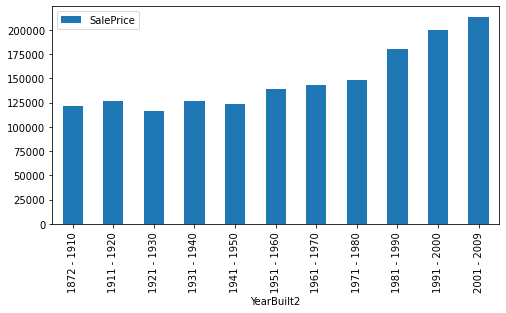

In [189]:
house2.groupby('YearBuilt2')[['SalePrice']].median().plot.bar(figsize=(8, 4), grid=False)

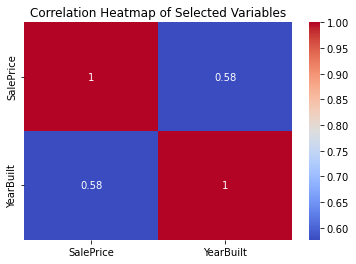

In [191]:
correlation_matrix = house2[['SalePrice', 'YearBuilt']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Selected Variables')
plt.show()

In [200]:
del house2['Unnamed: 0']

In [205]:
del house2['Id']

In [206]:
del house2['LotArea']

In [207]:
house2.corr()

,YearBuilt,FullBath,TotRmsAbvGrd,GarageArea,1stFlrSF,2ndFlrSF,SalePrice,FullBath2
YearBuilt,1.000000,0.469809,0.056115,0.462988,0.244170,0.006599,0.576359,0.479333
FullBath,0.469809,1.000000,0.521157,0.378847,0.344194,0.396212,0.575136,0.990092
TotRmsAbvGrd,0.056115,0.521157,1.000000,0.276912,0.355899,0.608092,0.467039,0.520559
GarageArea,0.462988,0.378847,0.276912,1.000000,0.438055,0.111451,0.607435,0.385254
1stFlrSF,0.244170,0.344194,0.355899,0.438055,1.000000,-0.264579,0.522463,0.349909
2ndFlrSF,0.006599,0.396212,0.608092,0.111451,-0.264579,1.000000,0.309113,0.396629
SalePrice,0.576359,0.575136,0.467039,0.607435,0.522463,0.309113,1.000000,0.581501
FullBath2,0.479333,0.990092,0.520559,0.385254,0.349909,0.396629,0.581501,1.000000


<AxesSubplot:>

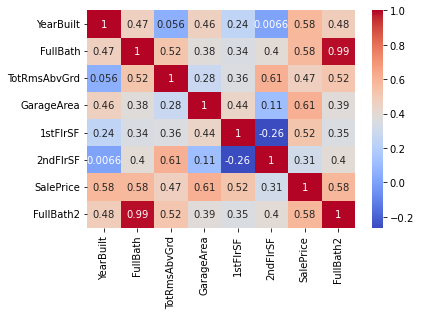

In [208]:
house_heat = house2.corr()
sns.heatmap(house_heat, annot=True, cmap='coolwarm')

In [209]:
house.groupby('TotRmsAbvGrd')['SalePrice'].describe().round(1)

,count,mean,std,min,25%,50%,75%,max
TotRmsAbvGrd,,,,,,,,
2,1.0,39300.0,NaN,39300.0,39300.0,39300.0,39300.0,39300.0
3,17.0,111217.6,33108.1,60000.0,81000.0,100000.0,143000.0,155900.0
4,97.0,122844.6,41661.8,34900.0,93000.0,120500.0,140000.0,260000.0
5,273.0,139739.8,45069.1,52000.0,112500.0,130000.0,156000.0,328900.0
6,400.0,160243.8,46455.4,37900.0,131475.0,154750.0,185000.0,325000.0
7,317.0,189497.4,53388.7,55000.0,153900.0,181900.0,226000.0,340000.0
8,177.0,202914.4,60497.4,81000.0,157000.0,193500.0,239900.0,340000.0
9,65.0,231181.1,63550.0,98000.0,187500.0,242000.0,278000.0,335000.0
10,32.0,215226.5,77012.4,90000.0,142200.0,226750.0,285500.0,335000.0
